In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import scipy.stats as stats
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
traindata=pd.read_csv("C:/Users/Moiz/Desktop/WALMART-Sales-Prediction-master/train.csv")
testdata=pd.read_csv('C:/Users/Moiz/Desktop/WALMART-Sales-Prediction-master/test.csv')
storedata=pd.read_csv('C:/Users/Moiz/Desktop/WALMART-Sales-Prediction-master/stores.csv')
featuredata=pd.read_csv('C:/Users/Moiz/Desktop/WALMART-Sales-Prediction-master/features.csv')

In [3]:
print(traindata.shape)
traindata.head(10)

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [4]:
traindata.isna().sum()  #Count the total number of null values

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [5]:
traindata.duplicated().sum() #check that the data has duplicate number or not

0

In [6]:
print(testdata.shape)

(115064, 4)


In [7]:
testdata.head(10)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


In [8]:
testdata.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [9]:
traindata.duplicated().sum()

0

In [10]:
print(storedata.shape)

(45, 3)


In [11]:
storedata.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [12]:
storedata.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [13]:
storedata.duplicated().sum()

0

In [14]:
print(featuredata.shape)

(8190, 12)


In [15]:
featuredata.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
featuredata.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [17]:
storedata.duplicated().sum()

0

In [18]:
# for merging the datasets
traindata_merged=pd.merge(traindata,featuredata, on=['Store','Date'], how='inner')
traindata_merged=pd.merge(traindata_merged,storedata,on='Store',how='inner')
traindata_merged.drop(['IsHoliday_y'], axis=1, inplace=True)
traindata_merged.rename(columns={'IsHoliday_x':'IsHoliday'}, inplace=True)

In [19]:
traindata_merged=pd.merge(traindata,featuredata, on=['Store','Date'], how='inner')
traindata_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [20]:
testdata_merged=pd.merge(testdata,featuredata, on=['Store','Date'], how='inner')
testdata_merged=pd.merge(testdata_merged,storedata,on='Store',how='inner')
testdata_merged.drop(['IsHoliday_y'], axis=1, inplace=True)
testdata_merged.rename(columns={'IsHoliday_x':'IsHoliday'}, inplace=True)

In [21]:
print(testdata_merged.shape)

(115064, 15)


In [22]:
traindata_merged.head(10)#MarkDown has Null values

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [23]:
traindata_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 15 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday_y     421570 non-null bool
dtypes: bool(2), float64(10), int64(2), object(1)
memory usage: 45.8+ MB


In [24]:
traindata_merged.describe().T


,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [25]:
#missing values
traindata_merged.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [26]:
traindata_merged = traindata_merged.assign(md1 = traindata_merged.MarkDown1.notnull())  #converting MarkDwn1 null values into 0
traindata_merged = traindata_merged.assign(md2 = traindata_merged.MarkDown2.notnull())
traindata_merged = traindata_merged.assign(md3 = traindata_merged.MarkDown3.notnull())
traindata_merged = traindata_merged.assign(md4 = traindata_merged.MarkDown4.notnull())
traindata_merged = traindata_merged.assign(md5 = traindata_merged.MarkDown5.notnull())

In [123]:
traindata_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,md1,md2,md3,md4,md5
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True
5,1,6,2010-02-05,5749.03,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True
6,1,7,2010-02-05,21084.08,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True
7,1,8,2010-02-05,40129.01,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True
8,1,9,2010-02-05,16930.99,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True
9,1,10,2010-02-05,30721.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,True,True,True,True,True


In [27]:
traindata_merged.fillna(0, inplace=True)

In [28]:
#for the missing values
testdata_merged.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [29]:
testdata_merged = testdata_merged.assign(md1 = testdata_merged.MarkDown1.notnull())
testdata_merged = testdata_merged.assign(md2 = testdata_merged.MarkDown2.notnull())
testdata_merged = testdata_merged.assign(md3 = testdata_merged.MarkDown3.notnull())
testdata_merged = testdata_merged.assign(md4 = testdata_merged.MarkDown4.notnull())
testdata_merged = testdata_merged.assign(md5 = testdata_merged.MarkDown5.notnull())

In [30]:
testdata_merged.CPI.fillna(testdata_merged.CPI.median(), inplace=True)
testdata_merged.Unemployment.fillna(testdata_merged.Unemployment.median(), inplace=True)

In [31]:
testdata_merged.fillna(0, inplace=True)

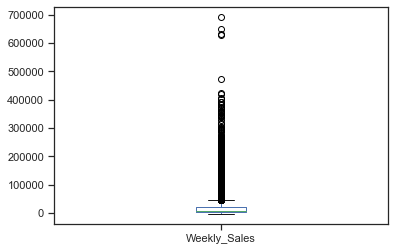

In [32]:
traindata_merged.Weekly_Sales.plot(kind='box')
# dots represents outliers 
#more outliers

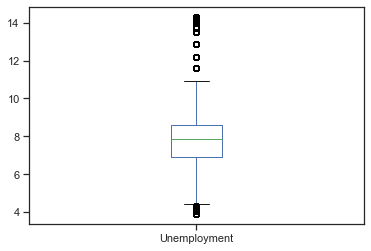

In [33]:
traindata_merged.Unemployment.plot(kind='box')
# dots represents outliers 
#more outliers

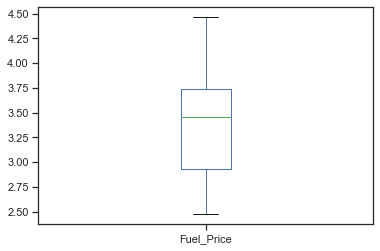

In [34]:
traindata_merged.Fuel_Price.plot(kind='box')
#less outliers

-25109.653749999998 47395.15625


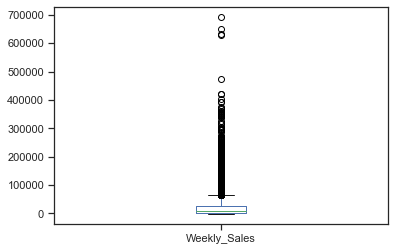

In [35]:
q25, q75 = traindata_merged.Weekly_Sales.quantile([0.25,0.75])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min,max)
traindata_merged.Weekly_Sales = np.where(traindata_merged.Weekly_Sales>max, max, traindata.Weekly_Sales)
#traindata_merged.Weekly_Sales = np.where(traindata_merged.Weekly_Sales<min, min, traindata.Weekly_Sales)
traindata_merged.Weekly_Sales.plot(kind='box')

In [36]:
traindata_merged.Weekly_Sales.describe()

count    421570.000000
mean      18223.349264
std       23019.456016
min       -3924.000000
25%        2351.000000
50%        8858.680000
75%       26812.105000
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [37]:
traindata_merged.Fuel_Price.describe()

count    421570.000000
mean          3.361027
std           0.458515
min           2.472000
25%           2.933000
50%           3.452000
75%           3.738000
max           4.468000
Name: Fuel_Price, dtype: float64

In [38]:
traindata_merged.Unemployment.describe()

count    421570.000000
mean          7.960289
std           1.863296
min           3.879000
25%           6.891000
50%           7.866000
75%           8.572000
max          14.313000
Name: Unemployment, dtype: float64

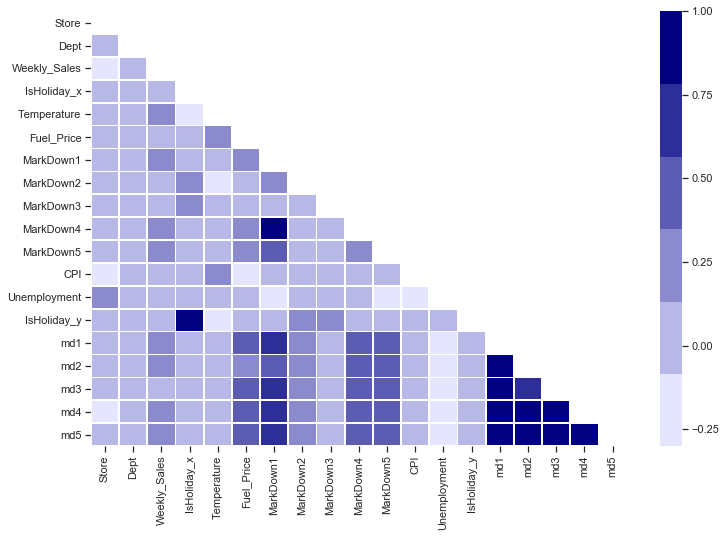

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
mask = np.zeros_like(traindata_merged.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(traindata_merged.corr(), mask=mask, cmap=sns.light_palette("navy"), linewidths=.75)

In [1]:
sns.barplot(traindata_merged['Type'], traindata_merged['Weekly_Sales'],alpha=0.5,color='blue')


NameError: name 'plt' is not defined

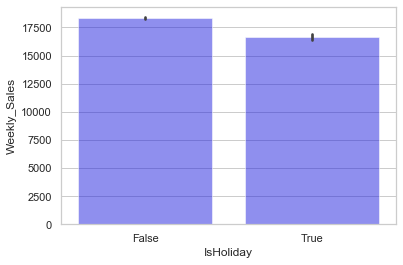

In [32]:
sns.barplot(traindata_merged['IsHoliday'], traindata_merged['Weekly_Sales'],alpha=0.5,color='blue')


In [33]:
# for converting the booleans to binary
traindata_merged.IsHoliday = traindata_merged.IsHoliday.astype(int)
traindata_merged.md1_present = traindata_merged.md1_present.astype(int)
traindata_merged.md2_present = traindata_merged.md2_present.astype(int)
traindata_merged.md3_present = traindata_merged.md3_present.astype(int)
traindata_merged.md4_present = traindata_merged.md4_present.astype(int)
traindata_merged.md5_present = traindata_merged.md5_present.astype(int)

testdata_merged.IsHoliday = testdata_merged.IsHoliday.astype(int)
testdata_merged.md1_present = testdata_merged.md1_present.astype(int)
testdata_merged.md2_present = testdata_merged.md2_present.astype(int)
testdata_merged.md3_present = testdata_merged.md3_present.astype(int)
testdata_merged.md4_present = testdata_merged.md4_present.astype(int)
testdata_merged.md5_present = testdata_merged.md5_present.astype(int)

In [34]:
traindata_merged['Type'] = LabelEncoder().fit_transform(traindata_merged['Type'])
testdata_merged['Type'] = LabelEncoder().fit_transform(testdata_merged['Type'])

In [35]:
# for Dropping the Markdown 4 basis multi-collinearity check
traindata_merged = traindata_merged.drop(['MarkDown4'],axis=1)

In [36]:
#To Extract the Months and add it as a feature to capture seasonality
traindata_merged['Date'] = pd.to_datetime(traindata_merged['Date'])
traindata_merged['Month'] = traindata_merged['Date'].dt.month

testdata_merged['Date'] = pd.to_datetime(testdata_merged['Date'])
testdata_merged['Month'] = testdata_merged['Date'].dt.month

In [133]:
X = traindata_merged.drop(['Date', 'Weekly_Sales'], axis=1)
Y = traindata_merged.Weekly_Sales

In [39]:
traindata_X, testdata_X, traindata_Y, testdata_Y = train_test_split(X, Y, train_size=0.70, random_state=7)
sc = StandardScaler().fit(traindata_X)
sc_traindata = sc.transform(traindata_X)
sc_testdata = sc.transform(testdata_X)

In [40]:
rf = RandomForestRegressor(n_estimators=10, max_depth=15, min_samples_split=10).fit(sc_traindata,traindata_Y)


In [134]:
print(np.sqrt(mean_squared_error(rf.predict(sc_traindata),traindata_Y)))
print(np.sqrt(mean_squared_error(rf.predict(sc_testdata),testdata_Y)))

9528.307881977977
10504.359434662441


In [42]:
rf_testdata_pred = pd.DataFrame( { 'actual':  testdata_Y,
                            'predicted': rf.predict(sc_testdata) } )

In [135]:
rf_testdata_pred.head(10)


,actual,predicted
347476,1007.73000,2205.746127
141283,2166.48000,6980.936577
211171,5893.54000,6752.983413
241734,2088.00000,6638.982633
274487,49122.45000,54425.297133
331728,21498.15000,25883.809655
372577,2021.23000,8630.605342
243958,470.00000,734.759536
343727,47395.15625,6908.370798
101738,9486.25000,6196.187699


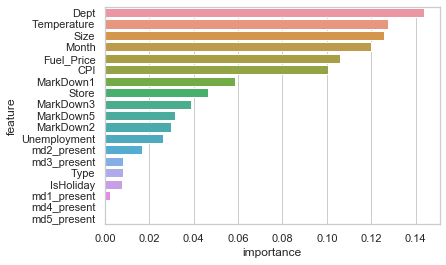

In [44]:
indices = np.argsort(rf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(traindata_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         traindata_X.columns[indices[f]],
                         rf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [45]:
lm = LinearRegression().fit(sc_traindata,traindata_Y)
print(np.sqrt(mean_squared_error(lm.predict(sc_traindata),traindata_Y)))
print(np.sqrt(mean_squared_error(lm.predict(sc_testdata),testdata_Y)))


20950.05381012814
20863.801091936744


In [48]:

X = traindata_merged.drop(['Date', 'Weekly_Sales', 'md1_present', 'md4_present', 'md5_present', 'md3_present', 
                       'IsHoliday', 'Type', 'Unemployment', 'MarkDown1', 'MarkDown2'], axis=1)
Y = traindata_merged.Weekly_Sales
traindata_X, testdata_X, traindata_Y, testdata_Y = train_test_split(X, Y, train_size=0.70, random_state=7)
sc = StandardScaler().fit(traindata_X)
sc_traindata = sc.transform(traindata_X)
sc_testdata = sc.transform(testdata_X)

In [49]:
test = sc.transform(testdata_merged[X.columns])

In [51]:
X = traindata_merged.drop(['Date', 'Weekly_Sales', 'md1_present', 'md4_present', 'md5_present', 'md3_present', 
                       'IsHoliday', 'Type', 'Unemployment', 'MarkDown1', 'MarkDown2'], axis=1)
Y = traindata_merged.Weekly_Sales
traindata_X, testdata_X, traindata_Y, testdata_Y = train_test_split(X, Y, train_size=0.70, random_state=7)
sc = StandardScaler().fit(traindata_X)
sc_traindata = sc.transform(traindata_X)
sc_testdata = sc.transform(testdata_X)

In [52]:
rf = RandomForestRegressor(n_estimators=10, max_depth=15, min_samples_split=10).fit(sc_traindata,traindata_Y)
print(np.sqrt(mean_squared_error(rf.predict(sc_traindata),traindata_Y)))
print(np.sqrt(mean_squared_error(rf.predict(sc_testdata),testdata_Y)))

9528.307881977977
10504.359434662441


In [53]:
rf_testdata_pred = pd.DataFrame( { 'actual':  testdata_Y,
                            'predicted': rf.predict(sc_testdata) } )
rf_testdata_pred.head()

,actual,predicted
347476,1007.73,2205.746127
141283,2166.48,6980.936577
211171,5893.54,6752.983413
241734,2088.00,6638.982633
274487,49122.45,54425.297133


In [54]:
testdata = sc.transform(testdata_merged[X.columns])

In [55]:
prediction = pd.concat([testdata_merged.Store.astype(str), testdata_merged.Dept.astype(str), testdata_merged.Date.astype(str),
                        pd.DataFrame(rf.predict(test))], axis=1)

In [56]:
prediction.columns = ['Store', 'Dept', 'Date', 'Weekly_Sales']


In [57]:
prediction.head()


,Store,Dept,Date,Weekly_Sales
0,1,1,2012-11-02,13462.228770
1,1,2,2012-11-02,12810.356700
2,1,3,2012-11-02,12891.189583
3,1,4,2012-11-02,12891.189583
4,1,5,2012-11-02,12891.189583


In [58]:
prediction.to_csv('Walmart_Store_Sales_Prediction.csv', index=0)